# 

Implement a Decision Tree, Random Forest model to classify the animals in the zoo in to different categories.
Calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.

Dataset : Zoo.csv

NOTES : 

1. Import the dataset.
2. Find out the shape of data.
3. Find out null values in all columns.
4. Drop all the null values.


# import libraries 

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# load the data

In [6]:
df = pd.read_csv('./Zoo.csv')
df


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# EDA

In [7]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [9]:
df.shape

(101, 17)

In [10]:
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [13]:
df['type'].unique

<bound method Series.unique of 0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64>

In [14]:
df.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


### split the data into x and y

In [15]:
x = df.drop(['type'], axis = 1)
y = df['type']

## split the data inyo train and test set 

In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y ,random_state=123456)


## train the models 


In [17]:

def train_model_dt():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=3)
    model.fit(x_train , y_train)
    return model 

In [18]:
def train_random_forest():
    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier(max_depth=3)
    model.fit(x_train , y_train)
    return model

## evaluate the model

In [19]:
def evaluate_model(model , model_name):
    from sklearn.metrics import confusion_matrix, accuracy_score , precision_score ,recall_score , f1_score

    y_pred = model.predict(x_test)
    y_true = y_test

    # get the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"confusion matrix: ")
    print(cm)

    accuracy = accuracy_score(y_true , y_pred )
    precision = precision_score(y_true , y_pred , average = "macro")
    recall = recall_score(y_true, y_pred, average = "macro")
    f1 =f1_score(y_true, y_pred, average = "macro")

    return model_name ,cm,  accuracy , precision , recall ,f1

In [20]:
models = [
    
    (train_model_dt(), 'Decision Tree', (0, 0)),
    (train_random_forest(), 'Random Forest', (0, 1))
]

In [23]:
results = []
for (model, model_name,_) in models:
    results.append(evaluate_model(model, model_name))

confusion matrix: 
[[10  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  3  0]]
confusion matrix: 
[[10  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  2  1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
result_df = pd.DataFrame(results, columns=['Algorithm','confusion metrix', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
result_df

,Algorithm,confusion metrix,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,"[[10, 0, 0, 0, 0, 0], [0, 9, 0, 0, 0, 0], [0, ...",0.846154,0.500000,0.500000,0.50
1,Random Forest,"[[10, 0, 0, 0, 0, 0], [0, 9, 0, 0, 0, 0], [0, ...",0.923077,0.833333,0.722222,0.75


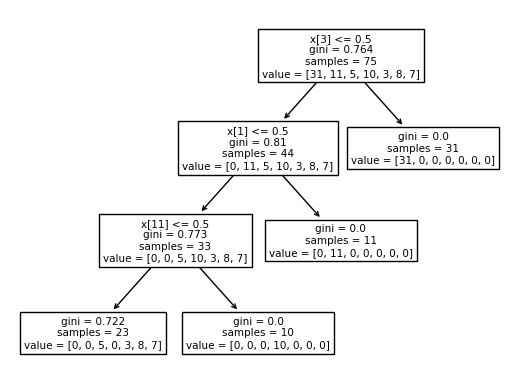

In [25]:
from sklearn.tree import plot_tree
result = plot_tree(models[0][0])